# TF Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import tensorflow as tf

In [4]:
x_data = np.linspace(0.0, 10, 1000000)

In [5]:
noise = np.random.randn(len(x_data))

In [7]:
noise

array([1.37776257, 0.14595017, 1.05715325, ..., 0.820219  , 0.3298239 ,
       1.7687656 ])

y = mx + b

b = 5

In [8]:
y_true = (0.5 * x_data) + 5 + noise

In [9]:
x_df = pd.DataFrame(data=x_data, columns=['X Data'])

In [10]:
y_df = pd.DataFrame(data=y_true, columns=['Y'])

In [11]:
y_df.head()

,Y
0,6.377763
1,5.145955
2,6.057163
3,6.083895
4,3.312257


In [12]:
my_data = pd.concat([x_df, y_df], axis='columns')

In [13]:
my_data.head()

,X Data,Y
0,0.00000,6.377763
1,0.00001,5.145955
2,0.00002,6.057163
3,0.00003,6.083895
4,0.00004,3.312257


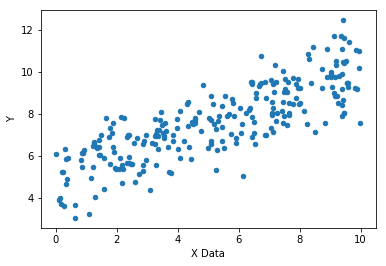

In [14]:
my_data.sample(n=250).plot(kind='scatter', x='X Data', y='Y')

In [15]:
batch_size = 8

In [16]:
np.random.randn(2)

array([ 0.92576324, -0.98315565])

In [18]:
m = tf.Variable(0.92)
b = tf.Variable(0.98)

In [22]:
xph = tf.placeholder(tf.float32, (batch_size))
yph = tf.placeholder(tf.float32, (batch_size))

In [23]:
y_model = m*xph + b

In [24]:
error = tf.reduce_sum(tf.square(yph - y_model))

In [26]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [27]:
init = tf.global_variables_initializer()

In [30]:
with tf.Session() as sess:
    sess.run(init)
    batches = 1000
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data), size=batch_size)
        feed = {xph: x_data[rand_ind], yph: y_true[rand_ind]}
        sess.run(train, feed_dict=feed)
    model_m, model_b = sess.run([m, b])

In [31]:
model_m

0.5442652

In [32]:
model_b

4.9218616

In [33]:
y_hat = x_data*model_m + model_b

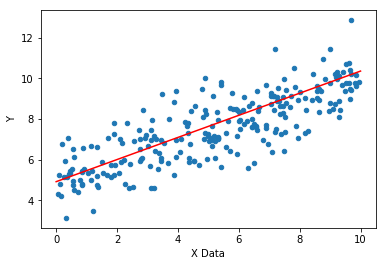

In [34]:
my_data.sample(250).plot(kind='scatter', x='X Data', y='Y')
plt.plot(x_data, y_hat, 'r')

# TF Estimator 

In [58]:
feat_cols = [tf.feature_column.numeric_column('x', shape=(1))]

In [59]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp8czdz305', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f3bc01032e8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [60]:
from sklearn.model_selection import train_test_split

In [61]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data, y_true, 
                                                    test_size=0.3, random_state=101)

In [62]:
print(x_train.shape)

(700000,)


In [63]:
input_func = tf.estimator.inputs.numpy_input_fn({'x': x_train}, y_train,
                                                batch_size=8, num_epochs=None, shuffle=True)

In [64]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x': x_train}, y_train,
                                                batch_size=8, num_epochs=1000, shuffle=False)

In [65]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x': x_eval}, y_eval,
                                                batch_size=8, num_epochs=1000, shuffle=False)

In [66]:
estimator.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp8czdz305/model.ckpt.
INFO:tensorflow:loss = 492.24045, step = 1
INFO:tensorflow:global_step/sec: 739.747
INFO:tensorflow:loss = 17.63213, step = 101 (0.137 sec)
INFO:tensorflow:global_step/sec: 882.523
INFO:tensorflow:loss = 8.983452, step = 201 (0.113 sec)
INFO:tensorflow:global_step/sec: 988.03
INFO:tensorflow:loss = 36.70449, step = 301 (0.102 sec)
INFO:tensorflow:global_step/sec: 913.979
INFO:tensorflow:loss = 8.852209, step = 401 (0.108 sec)
INFO:tensorflow:global_step/sec: 944.872
INFO:tensorflow:loss = 19.594912, step = 501 (0.106 sec)
INFO:tensorflow:global_step/sec: 851.224
INFO:tensorflow:loss = 10.910737, step = 601 (0.119 sec)
INFO:tensorflow:global_step/sec: 963.147
INFO:tensorflow:loss 

In [67]:
train_metrics = estimator.evaluate(input_fn=train_input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-06T11:19:15Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /tmp/tmp8czdz305/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-03-06-11:19:17
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.1016303, global_step = 1000, label/mean = 7.507209, loss = 8.813043, predictio

In [68]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-06T11:20:07Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp8czdz305/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-03-06-11:20:08
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0959616, global_step = 1000, label/mean = 7.4750247, loss = 8.767693, prediction/mean = 7.3506002
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 10

In [69]:
print('TRAINING DATA METRICS')
print(train_metrics)

TRAINING DATA METRICS
{'average_loss': 1.1016303, 'label/mean': 7.507209, 'loss': 8.813043, 'prediction/mean': 7.371803, 'global_step': 1000}


In [70]:
print('EVAL METRICS')
print(eval_metrics)

EVAL METRICS
{'average_loss': 1.0959616, 'label/mean': 7.4750247, 'loss': 8.767693, 'prediction/mean': 7.3506002, 'global_step': 1000}


In [71]:
brand_new_data = np.linspace(0, 10, 10)

In [72]:
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x': brand_new_data}, shuffle=False)

In [74]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp8czdz305/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.4349947], dtype=float32)},
 {'predictions': array([5.087326], dtype=float32)},
 {'predictions': array([5.7396574], dtype=float32)},
 {'predictions': array([6.3919888], dtype=float32)},
 {'predictions': array([7.0443206], dtype=float32)},
 {'predictions': array([7.6966515], dtype=float32)},
 {'predictions': array([8.348984], dtype=float32)},
 {'predictions': array([9.001314], dtype=float32)},
 {'predictions': array([9.653646], dtype=float32)},
 {'predictions': array([10.305978], dtype=float32)}]

In [75]:
predictions = []
for pred in estimator.predict(input_fn=input_fn_predict):
    predictions.append(pred['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp8czdz305/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [76]:
predictions

[array([4.4349947], dtype=float32),
 array([5.087326], dtype=float32),
 array([5.7396574], dtype=float32),
 array([6.3919888], dtype=float32),
 array([7.0443206], dtype=float32),
 array([7.6966515], dtype=float32),
 array([8.348984], dtype=float32),
 array([9.001314], dtype=float32),
 array([9.653646], dtype=float32),
 array([10.305978], dtype=float32)]

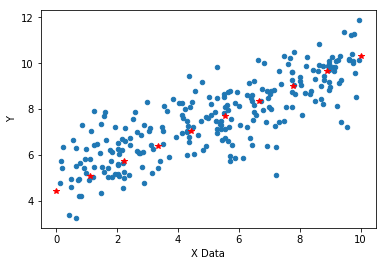

In [78]:
my_data.sample(n=250).plot(kind='scatter', x='X Data', y='Y')
plt.plot(brand_new_data, predictions, 'r*')